### Extract image features

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [16]:
import sys
sys.path.append('../')

from functions.fun_features import load_images_from_folder, process_book_cover

In [17]:
images = load_images_from_folder('../data/book_covers/')

img = images[0]

In [18]:
len(images)

166

In [19]:
img[0]

'000651250X.jpg'

#### Note - OpenCV is changing color of images. Double check

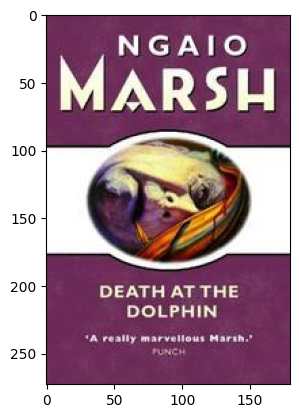

In [20]:
img[1].shape

## Plot the image
plt.imshow(img[1])


In [21]:
type(img[1])

numpy.ndarray

In [22]:
domin_color, mood = process_book_cover(img[1])
mood

'Calm with saturated colors'

In [23]:
type(domin_color)

tuple

### Loop around images

In [24]:
## Create empty dataframe
import pandas as pd

df = pd.DataFrame(columns=['image','dominant_color (RGB)', 'mood'])


In [25]:
len(images)

166

In [26]:
for image in images:
    domin_color, mood = process_book_cover(image[1])
    img_name = image[0]

    row = pd.DataFrame([[img_name, domin_color, mood]], columns=['image','dominant_color (RGB)', 'mood'])
    df = pd.concat([df, row], ignore_index=True)
    

c:\GIT\02. Personal\book-recommendation\notebooks\..\functions\fun_features.py:68: RuntimeWarning: overflow encountered in scalar multiply
  hue *= 2


In [27]:
df

,image,dominant_color (RGB),mood
0,000651250X.jpg,"(80, 82, 141)",Calm with saturated colors
1,006053429X.jpg,"(63, 113, 125)",Calm with saturated colors
2,014009203X.jpg,"(106, 135, 156)",Mysterious with saturated colors
3,014012411X.jpg,"(122, 126, 123)",Mysterious with saturated colors
4,014130975X.jpg,"(45, 94, 104)",Calm with saturated colors
...,...,...,...
161,8479017694.jpg,"(219, 229, 208)",Mysterious and bright with saturated colors
162,8484034445.jpg,"(76, 109, 113)",Calm with saturated colors
163,8845912450.jpg,"(164, 154, 166)",Calm with saturated colors
164,8874260008.jpg,"(248, 246, 245)",Mysterious and bright with saturated colors


In [28]:
df.to_csv('interm_outputs/book_image_features.csv')